**Про зарплаты**




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
list_rus = ["Без имени: 0", "Возраст","Пол", "Уровень образования", "Должность", "Стаж работы", "Зарплата", "Страна", "Раса"]

In [ ]:
sal = pd.read_csv('https://raw.githubusercontent.com/catprokhorova/HW_datasets/main/EDA_1/salary_dataset.csv')
sal.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [ ]:
sal.columns = list_rus

In [ ]:
sal.drop("Без имени: 0", axis=1, inplace=True) # удалил ненужный столбец

In [ ]:
sal.head(3)

,Возраст,Пол,Уровень образования,Должность,Стаж работы,Зарплата,Страна,Раса
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White


In [ ]:
sal.info()

In [ ]:
sal.isna().mean()
sal.isna().sum() # Пустот мало

Без имени: 0           0
Возраст                2
Пол                    2
Уровень образования    3
Должность              2
Стаж работы            3
Зарплата               5
Страна                 0
Раса                   0
dtype: int64

**ЗАДАНИЕ_1**

**Проведите оценку данных по столбцам, посмотрите визуально на распределение данных, определите базовые статистики, где это возможно.**

**Однофакторный анализ**

In [ ]:
# Расчёт мер центральной тенденции количественных данных

**Возраст**

Возрат (медиана) - 32.0
Возрат (мода) - 27.0
Возрат (среднее значение) - 34.0


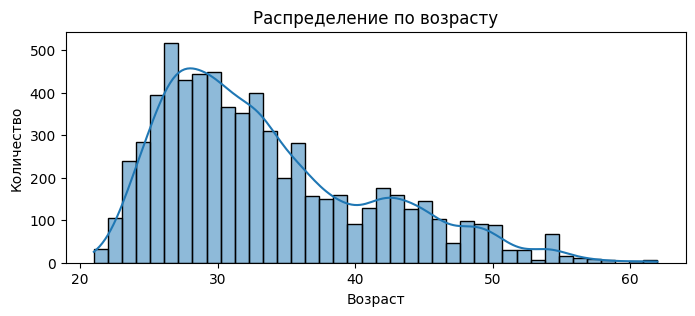

In [ ]:
print(f"Возрат (медиана) - {sal['Возраст'].median()}")
print(f"Возрат (мода) - {sal['Возраст'].mode()[0]}")
print(f"Возрат (среднее значение) - {sal['Возраст'].mean().round(0)}")

plt.figure(figsize=[8, 3])
sns.histplot(data=sal, x="Возраст", bins=40, kde=True)
plt.title("Распределение по возрасту")
plt.ylabel("Количество")
plt.show()

# Распределение ассимитричное с положительным скосом.

**Стаж работы**

Стаж работы (медиана) - 7.0
Стаж работы (мода) - 2.0
Стаж работы (среднее значение) - 8.0


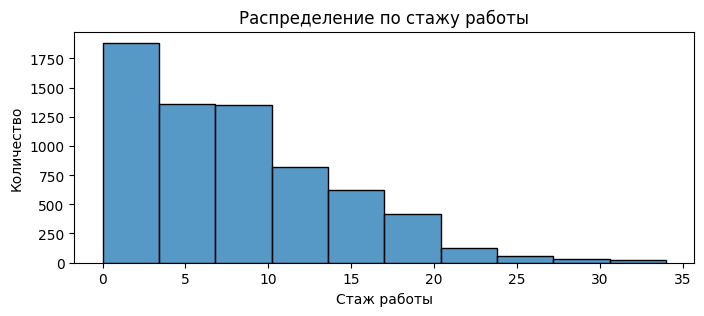

In [ ]:
print(f"Стаж работы (медиана) - {sal['Стаж работы'].median()}")
print(f"Стаж работы (мода) - {sal['Стаж работы'].mode()[0]}")
print(f"Стаж работы (среднее значение) - {sal['Стаж работы'].mean().round(0)}")

plt.figure(figsize=[8, 3])
sns.histplot(data=sal, x="Стаж работы", bins=10)
plt.title("Распределение по стажу работы")
plt.ylabel("Количество")
plt.show()

# Распределение с обрывом слева

**Зарплата**

Зарплата (медиана) - 115000.0
Зарплата (мода) - 140000.0
Зарплата (среднее значение) - 115327.0


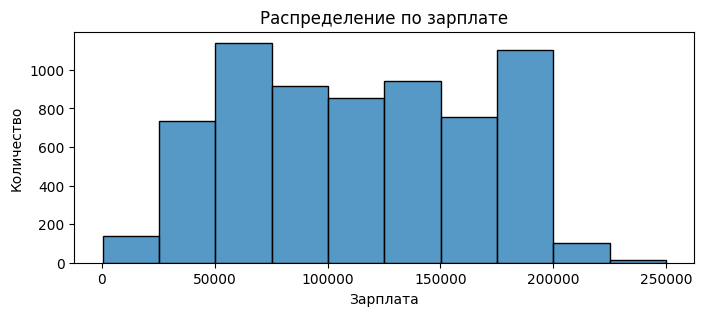

In [ ]:
print(f"Зарплата (медиана) - {sal['Зарплата'].median()}")
print(f"Зарплата (мода) - {sal['Зарплата'].mode()[0]}")
print(f"Зарплата (среднее значение) - {sal['Зарплата'].mean().round(0)}")

plt.figure(figsize=[8, 3])
sns.histplot(data=sal, x="Зарплата", bins=10)
plt.title("Распределение по зарплате")
plt.ylabel("Количество")
plt.show()

#Мультимодальное распределение???

**Пол**

Пол
Male      0.548195
Female    0.449717
Other     0.002089
Name: proportion, dtype: float64


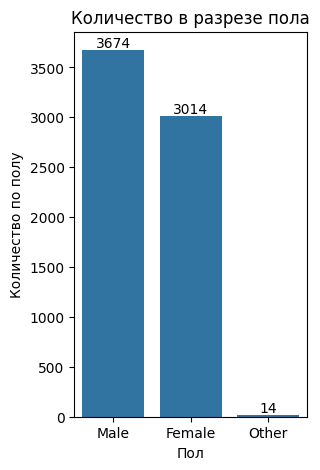

In [ ]:
print(sal['Пол'].value_counts(normalize=True))

plt.figure(figsize=[3,5])
charts = sns.countplot(data=sal, x="Пол")
charts.bar_label(charts.containers[0]) #  определение значений
plt.title("Количество в разрезе пола")
plt.ylabel("Количество по полу")
plt.show()

**Уровень образования**

Уровень образования
Bachelor's Degree    0.338308
Master's Degree      0.234741
PhD                  0.204149
Bachelor's           0.112819
High School          0.066856
Master's             0.042979
phD                  0.000149
Name: proportion, dtype: float64


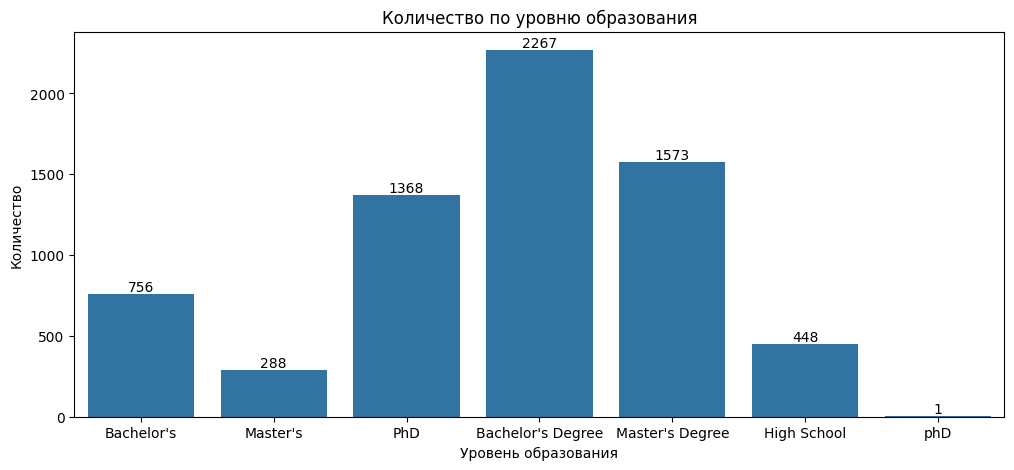

In [ ]:
print(sal['Уровень образования'].value_counts(normalize=True))

plt.figure(figsize=[12, 5])
charts = sns.countplot(data=sal, x='Уровень образования')
charts.bar_label(charts.containers[0])
plt.title('Количество по уровню образования')
plt.ylabel('Количество')
plt.show()

**Должность**

In [ ]:
sal['Должность'].nunique() # не представляю как такое количество обозначить графиком

193

In [ ]:
sal['Должность'].mode()[0] # Наиболее чаще встречается инженер-программист

'Software Engineer'

**Страна**

Страна
USA          1360
China        1343
UK           1337
Australia    1336
Canada       1328
Name: count, dtype: int64

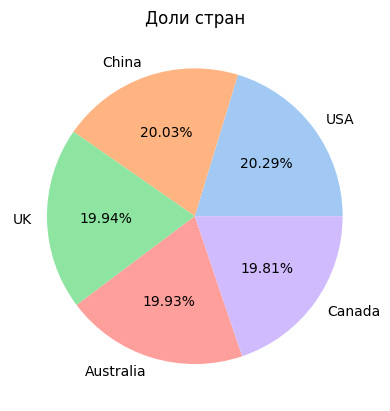

In [ ]:
# @title Текст заголовка по умолчанию
# посчитаем доли стран
val_count = sal['Страна'].value_counts()
display(val_count)

# зададим цветовую палитру
colors = sns.color_palette('pastel')
plt.pie(val_count, labels=val_count.index, colors=colors, autopct='%.2f%%')
plt.title("Доли стран")
plt.show()

**Раса**

Раса
White               0.293556
Asian               0.239111
Korean              0.068168
Australian          0.067422
Chinese             0.066229
Black               0.065185
African American    0.052804
Mixed               0.049821
Welsh               0.049672
Hispanic            0.048031
Name: proportion, dtype: float64


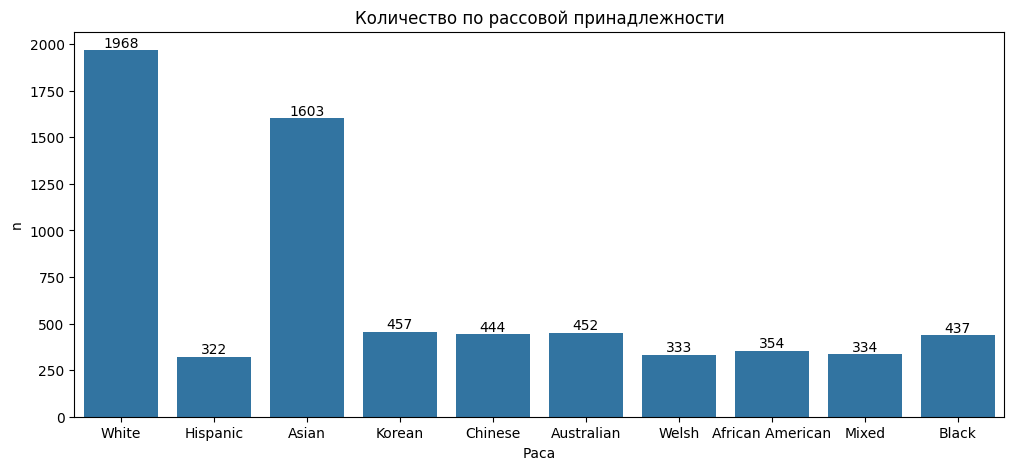

In [ ]:
# КАК ОТСОРТИРОВАТЬ ДИАГРАММУ и ВЫПОЛНИТЬ ГОРИЗОНТАЛЬНОЕ НАПРАВЛЕНИЕ ДИАГРАММЫ
print(sal['Раса'].value_counts(normalize=True))

plt.figure(figsize=[12, 5])
charts=sns.countplot(data=sal, x='Раса')
charts.bar_label(charts.containers[0])
plt.title('Количество по рассовой принадлежности')
plt.ylabel('n')
plt.show()

**ЗАДАНИЕ_2**

**Найдите выбросы в данных, для наглядности используйте соответствующие типы визуализаций. Попробуйте объяснить их появление в наборе.**

Пол
Male      3674
Female    3014
Other       14
Name: count, dtype: int64


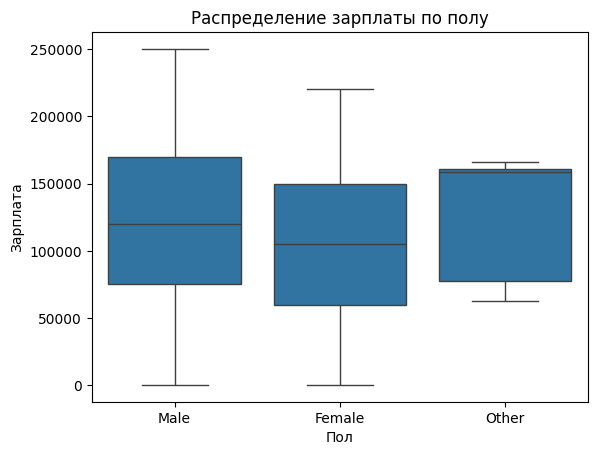

In [ ]:
# При распределении по полу выбросов нет. Больше зарплата у мужчин, медианная так же больше чем у женщин. У гендеров - мало данных
print(sal['Пол'].value_counts())
sns.boxplot(data=sal, x='Пол', y = 'Зарплата')
plt.title("Распределение зарплаты по полу")
plt.show()

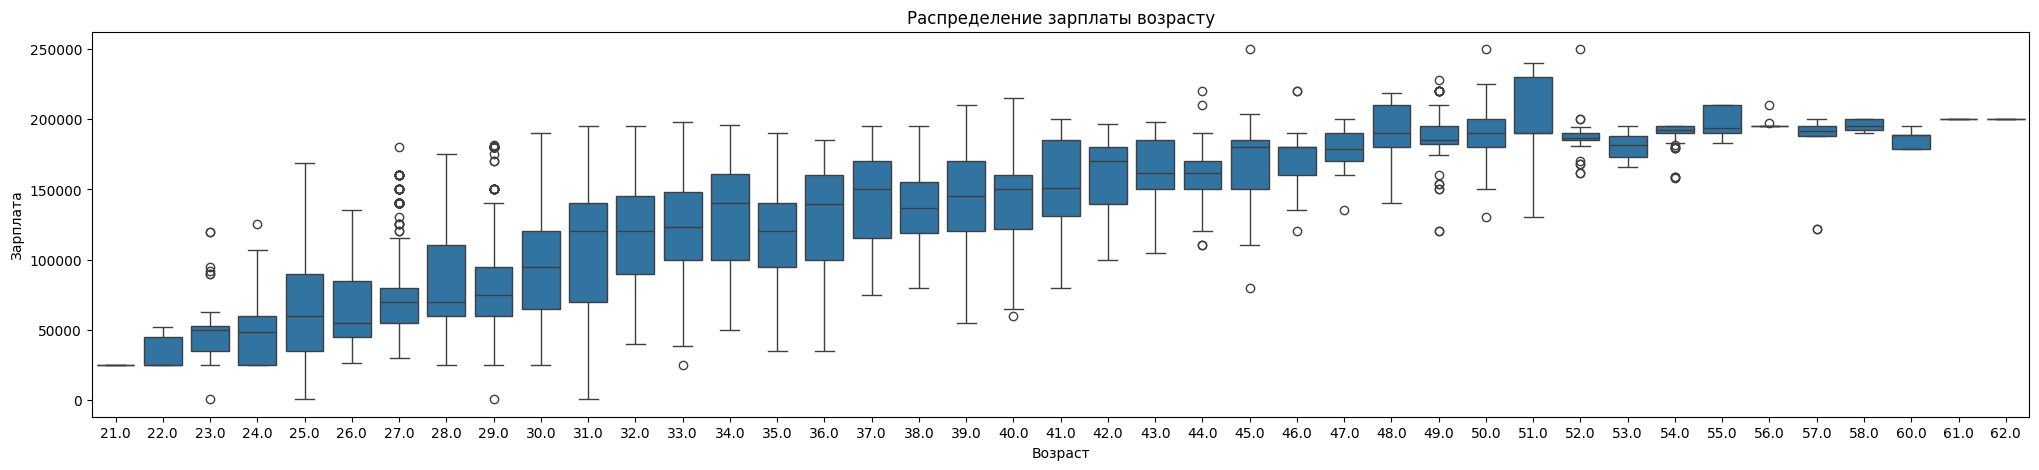

In [ ]:
# С увеличением возраста уведичивается и заплата. Наибольшие выбросы у молодых и старших возрастных групп (до 27 лет и  старше 44).
# У возрастных групп с 27 до 44 лет  выбросы по зарплате практически отсутствуют.
plt.figure(figsize=[25, 5])
sns.boxplot(data=sal, x='Возраст', y = 'Зарплата')
plt.title("Распределение зарплаты возрасту")
plt.show()

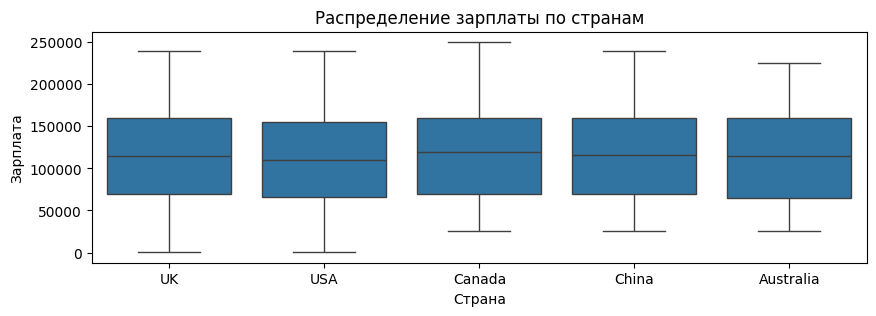

In [ ]:
# По странам выбросов нет. Медианная зарпалата, мин и максимальная больше всего в Канаде. Размах примерно равный
plt.figure(figsize=[10, 3])
sns.boxplot(data=sal, x='Страна', y = 'Зарплата' )
plt.title("Распределение зарплаты по странам")
plt.show()

**ЗАДАНИЕ_3**

**Задайте 4-6 вопросов к вашим данным и постарайтесь ответить на них графически**


In [ ]:
list_rus = ["Без имени: 0", "Возраст","Пол", "Уровень образования", "Должность", "Стаж работы", "Зарплата", "Страна", "Раса"]

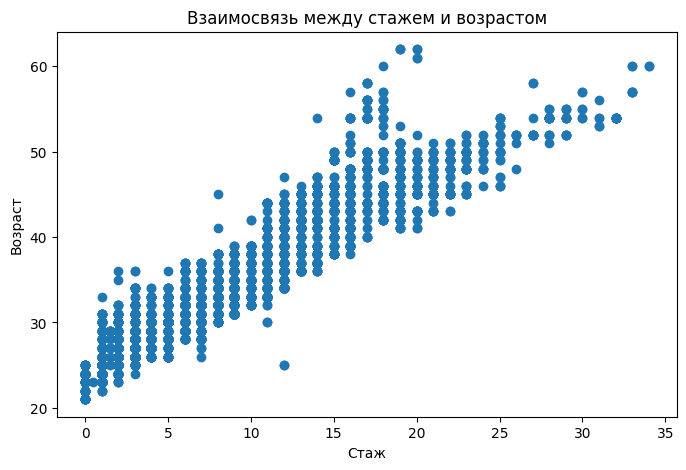

In [ ]:
# Можем предположить что чем старше тем больше стаж. Но у некоторых возрастных категориях таких как у людей старше 60 лет стаж не превышает 20 лет
plt.figure(figsize=[8, 5])
plt.scatter(data=sal, x="Стаж работы", y="Возраст")
plt.title("Взаимосвязь между стажем и возрастом")
plt.ylabel("Возраст")
plt.xlabel("Стаж")
plt.show()

***Матрица корреляций по всем столбцам.***

In [ ]:
!pip install phik

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_overview = sal.phik_matrix()
phik_overview

interval columns not set, guessing: ['Возраст', 'Стаж работы', 'Зарплата']


,Возраст,Пол,Уровень образования,Должность,Стаж работы,Зарплата,Страна,Раса
Возраст,1.000000,0.255273,0.529950,0.808099,0.900912,0.751977,0.000000,0.000000
Пол,0.255273,1.000000,0.373678,0.531148,0.282648,0.227609,0.000000,0.000000
Уровень образования,0.529950,0.373678,1.000000,0.935918,0.563642,0.681087,0.000000,0.000000
Должность,0.808099,0.531148,0.935918,1.000000,0.786814,0.891637,0.000000,0.042436
Стаж работы,0.900912,0.282648,0.563642,0.786814,1.000000,0.826806,0.046608,0.024028
Зарплата,0.751977,0.227609,0.681087,0.891637,0.826806,1.000000,0.094694,0.069613
Страна,0.000000,0.000000,0.000000,0.000000,0.046608,0.094694,1.000000,0.950452
Раса,0.000000,0.000000,0.000000,0.042436,0.024028,0.069613,0.950452,1.000000


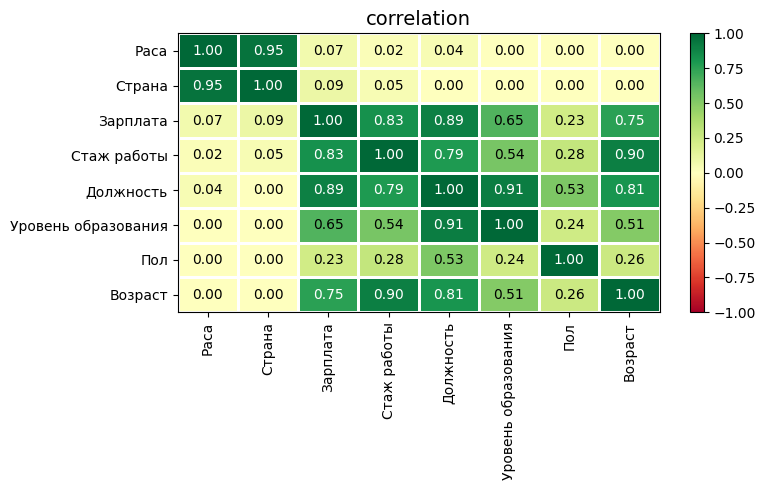

In [ ]:
# матрица корреляций по всем столбцам.
# Весьма высокая корреляция между зарплатой и занимаемой должности, стажем и возрастом, должности и уровня образования;
# высокая корреляция между зарплатой и стажем работы, зарплатой и возрастом, между стажем и должности;
# Заметная корреляция между зарплатой и уровня образования, стажем работы и уровня образования.
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(8, 5))

***Коэффициент глобальной корреляции***

interval columns not set, guessing: ['Возраст', 'Стаж работы', 'Зарплата']


/usr/local/lib/python3.10/dist-packages/phik/phik.py:319: RuntimeWarning: invalid value encountered in sqrt
  global_correlations = np.sqrt(


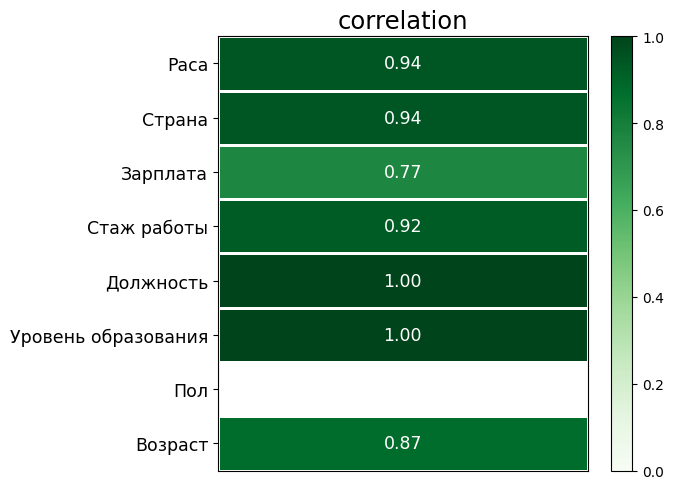

In [ ]:
global_correlation, global_labels = sal.global_phik()

plot_correlation_matrix(global_correlation,
	                        x_labels=[''], y_labels=global_labels,
	                        vmin=0, vmax=1,
	                        color_map="Greens",
	                        fontsize_factor=1.25)
plt.tight_layout()

***Раса и Образование***

In [ ]:
def plot_category_by_outcome(data, column, figsize=[20, 5], order=None, location='best'):
    plt.figure(figsize=figsize)
    sns.countplot(x=column, hue='Уровень образования', data=data, order=order)
    plt.title(f'{column} и Уровень образования')
    plt.legend(loc=location, title='Уровень образования')
    plt.show()

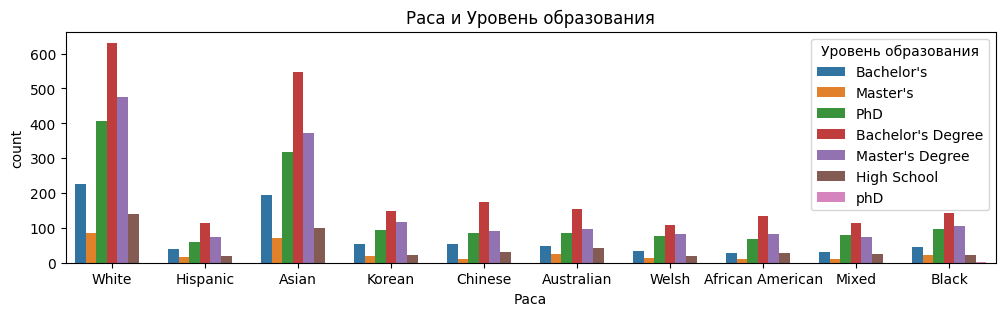

In [ ]:
# Уровень образования между расами. Корелляция между ними нулевая. График показывает встречаемость.
plot_category_by_outcome(sal, 'Раса', [12, 3])

**Многофакторный анализ**

***Зарплата по уровню образования в странах***

In [ ]:
# Одно значение - 'phD'
sal['Уровень образования'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [ ]:
sal.loc[sal['Уровень образования']=='phD']

,Возраст,Пол,Уровень образования,Должность,Стаж работы,Зарплата,Страна,Раса
5878,27.0,Male,phD,Marketing Coordinator,7.0,120000.0,Canada,Black


In [ ]:
sal.replace('phD', 'PhD', inplace=True)

In [ ]:
edu_income = sal.pivot_table(index='Уровень образования', columns='Страна', values='Зарплата', aggfunc='median')
edu_income

Страна,Australia,Canada,China,UK,USA
Уровень образования,,,,,
Bachelor's,130000.0,130000.0,130000.0,120000.0,130000.0
Bachelor's Degree,75000.0,75000.0,75000.0,70000.0,75000.0
High School,31000.0,30000.0,31500.0,32000.0,30000.0
Master's,175000.0,170000.0,180000.0,180000.0,180000.0
Master's Degree,120000.0,125000.0,125000.0,120000.0,120000.0
PhD,180000.0,170000.0,170000.0,170000.0,170000.0


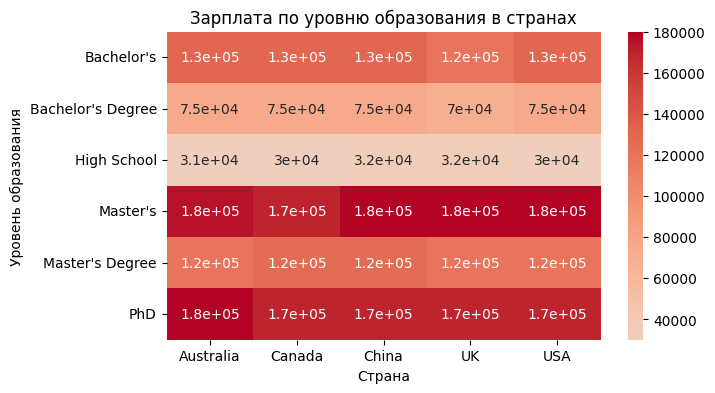

In [ ]:
# Как оказалось зарплата по уровню образования в странах примерно одинаковая
plt.figure(figsize=[7, 4])
sns.heatmap(edu_income, annot=True, cmap='coolwarm',center=0.117)
plt.title("Зарплата по уровню образования в странах")
plt.show()

***Возраст и уровень образования в странах***

In [ ]:
edu_income_1 = sal.pivot_table(index='Уровень образования', columns='Страна', values='Возраст', aggfunc='median')
edu_income_1

Страна,Australia,Canada,China,UK,USA
Уровень образования,,,,,
Bachelor's,29.0,28.0,30.0,29.0,29.0
Bachelor's Degree,29.0,29.0,29.0,29.0,29.0
High School,26.0,26.0,26.0,27.0,25.0
Master's,31.0,33.0,33.0,33.0,33.0
Master's Degree,34.0,35.0,35.0,35.0,34.0
PhD,43.0,43.0,42.0,41.5,42.0


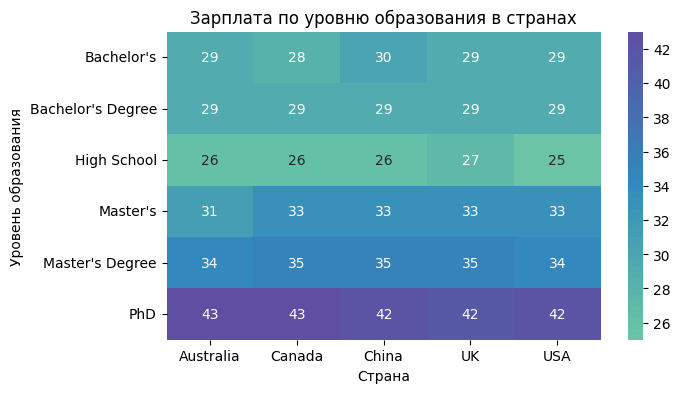

In [ ]:
# Логично что чем старше тем выше уровень образования. В разных странах данный возраст отличается не больше на 1-2 года. Чуть моложе специалисты из Австралии
plt.figure(figsize=[7, 4])
sns.heatmap(edu_income_1, annot=True, cmap='Spectral',center=0.117)
plt.title("Возраст и уровень образования в странах")
plt.show()